In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#load dataset
df = pd.read_csv("AB_NYC_2019.csv")
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [32]:
#Check missing values
print("Missing values before cleaning:\n", df.isnull().sum())


#--Cleaning--
#Fill null values in 'reviews_per_month' with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

#Drop rows with null 'name' 
df = df.dropna(subset=['name'])

#Remove duplicates
df = df.drop_duplicates()

#Ensure price > 0
df = df[df['price'] > 0]

#Drop unnecessary columns
df = df.drop(columns=['id', 'host_name', 'last_review'])

#Final check
print("Shape after cleaning:", df.shape)
print("Missing values after cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
Shape after cleaning: (48868, 13)
Missing values after cleaning:
 name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                       

In [33]:
# Descriptive statistics
print(df.describe())

# Listings by neighborhood group
print("\nListings by Neighborhood Group:")
print(df['neighbourhood_group'].value_counts())

# Room type distribution
print("\nRoom Type Distribution:")
print(df['room_type'].value_counts())


            host_id      latitude     longitude         price  minimum_nights  \
count  4.886800e+04  48868.000000  48868.000000  48868.000000    48868.000000   
mean   6.763215e+07     40.728948    -73.952174    152.756732        7.010948   
std    7.862640e+07      0.054531      0.046162    240.202905       20.017604   
min    2.438000e+03     40.499790    -74.244420     10.000000        1.000000   
25%    7.812758e+06     40.690090    -73.983072     69.000000        1.000000   
50%    3.079133e+07     40.723085    -73.955690    106.000000        3.000000   
75%    1.074344e+08     40.763120    -73.936297    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48868.000000       48868.000000                    48868.000000   
mean           23.278730           1.091138                        7.146538   
std            44.556899         

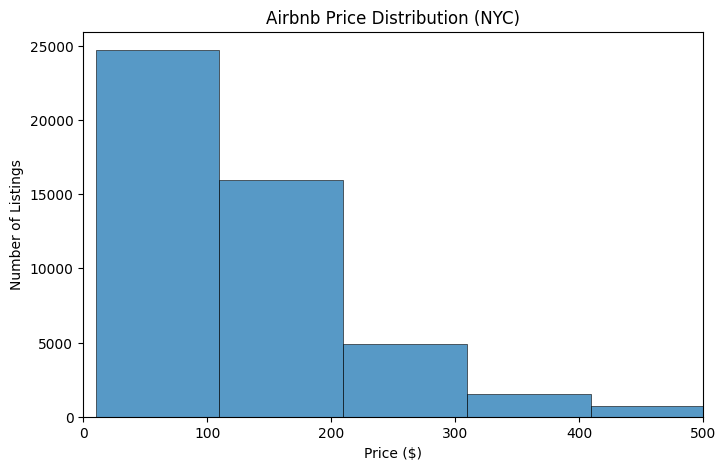

In [34]:
#Visualization 1: Price distribution (with cap)
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=100, kde=False)
plt.xlim(0, 500)  # cap to $500 to avoid outliers
plt.title("Airbnb Price Distribution (NYC)")
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.show()


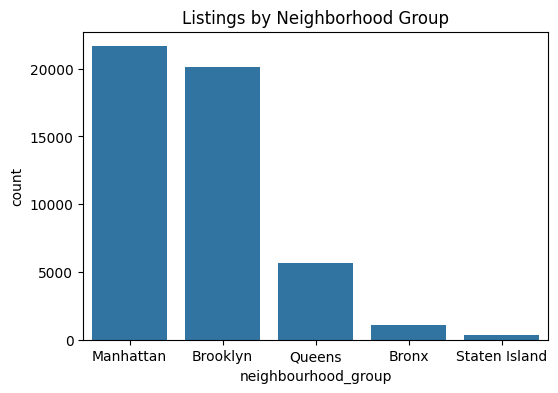

In [35]:
#Visualization 2: Listing by Borough
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title("Listings by Neighborhood Group")
plt.show()


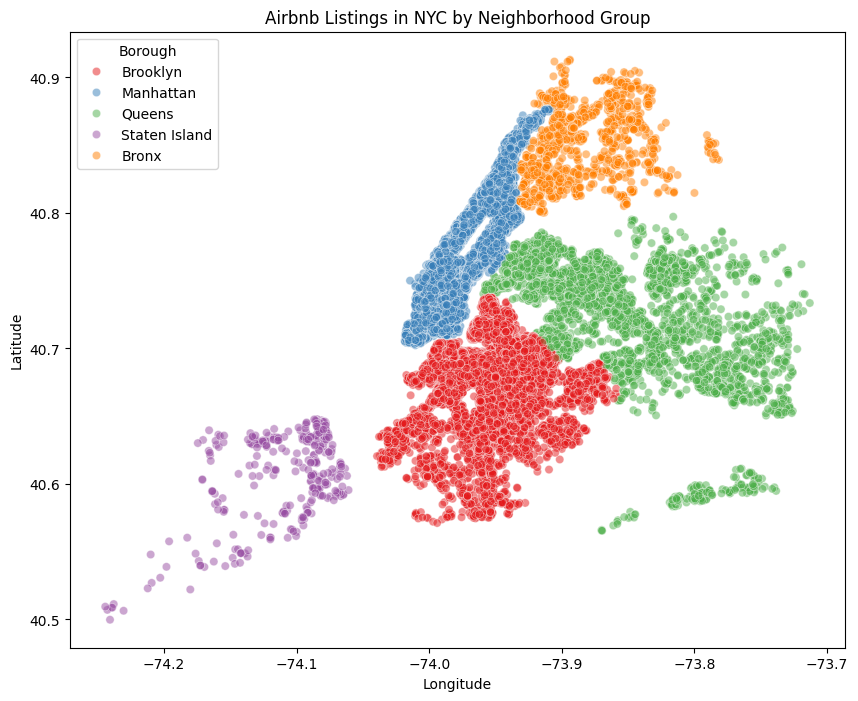

In [36]:
#Visualization 3: Geographic Scatter by Borough
plt.figure(figsize=(10,8))

# Scatterplot of latitude vs longitude
sns.scatterplot(
    data=df, 
    x='longitude', 
    y='latitude', 
    hue='neighbourhood_group',  # color by borough
    alpha=0.5,  # transparency
    palette='Set1'
)

plt.title("Airbnb Listings in NYC by Neighborhood Group")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Borough")
plt.show()


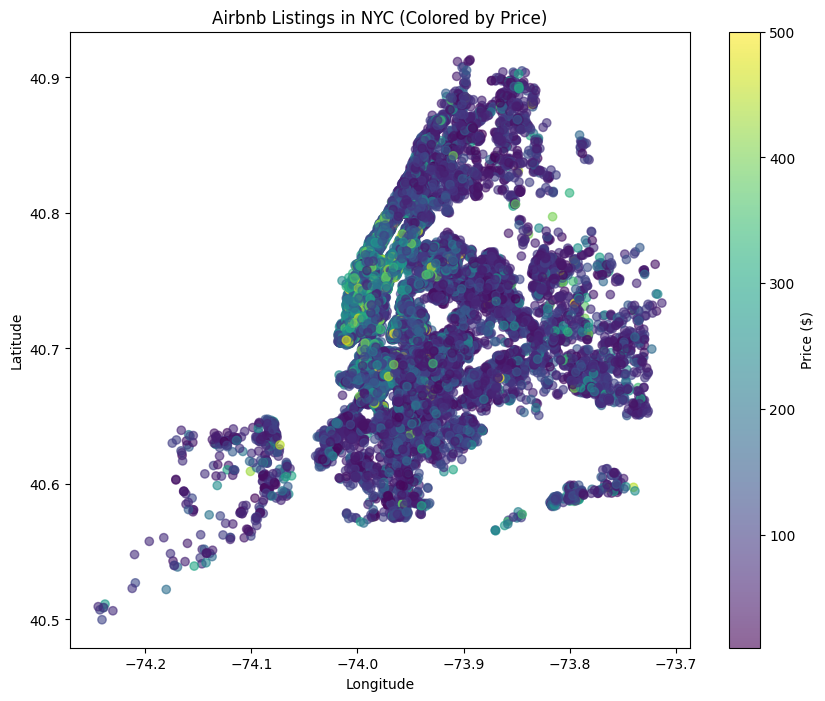

In [40]:
#visualization 4: Geographic Distribution colored by price 

plt.figure(figsize=(10,8))
mask = df['price'].between(1, 500)  # filter to keep chart readable

sc = plt.scatter(
    df.loc[mask, 'longitude'],
    df.loc[mask, 'latitude'],
    c=df.loc[mask, 'price'],
    alpha=0.6,
    cmap='viridis'
)

plt.title("Airbnb Listings in NYC (Colored by Price)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add colorbar instead of legend
cbar = plt.colorbar(sc)
cbar.set_label("Price ($)")
plt.show()
